<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch02_08_Seaborn%EC%8B%A4%EC%8A%B5_Iris%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜: 2022-04-19
* 이름: 김민규


## 학습내용

    - displot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


In [13]:
iris=pd.DataFrame(xs)
iris.columns=x_names # 컬럼명 지정

iris['label']=[y_names[i] for i in y] # i는 y의 값 (0,0,...1,1....)
#['setosa' 'versicolor' 'virginica']
iris
#iris['label'] = y
#iris['label'].replace([0,1,2],])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
sepal_size = iris.iloc[:,0]*iris.iloc[:,1]  # 너비 X 길이
sepal_size.median() # 중앙값 
#iris['sepal_size']=sepal_size
# 중앙값보다 작으면 small 크면 big 어레이 만들기
mask = sepal_size <= sepal_size.median()
iris[mask]
small_size = iris[mask]

mask_2 = sepal_size > sepal_size.median()
iris[mask_2]
big_size = iris[mask_2]


# 절반은 small, 절반은 big

In [35]:
small_size.head()
# small_size.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
6,4.6,3.4,1.4,0.3,setosa,15.64
7,5.0,3.4,1.5,0.2,setosa,17.00


In [36]:
big_size.head()
# big_size.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
0,5.1,3.5,1.4,0.2,setosa,17.85
4,5.0,3.6,1.4,0.2,setosa,18.00
5,5.4,3.9,1.7,0.4,setosa,21.06
10,5.4,3.7,1.5,0.2,setosa,19.98
14,5.8,4.0,1.2,0.2,setosa,23.20


#### | 데이터 기본 탐색


In [37]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_size
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,17.822867
std,0.828066,0.435866,1.765298,0.762238,3.361854
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,15.660000
50%,5.800000,3.000000,4.350000,1.300000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,20.325000
max,7.900000,4.400000,6.900000,2.500000,30.020000


In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
 5   sepal_size         150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


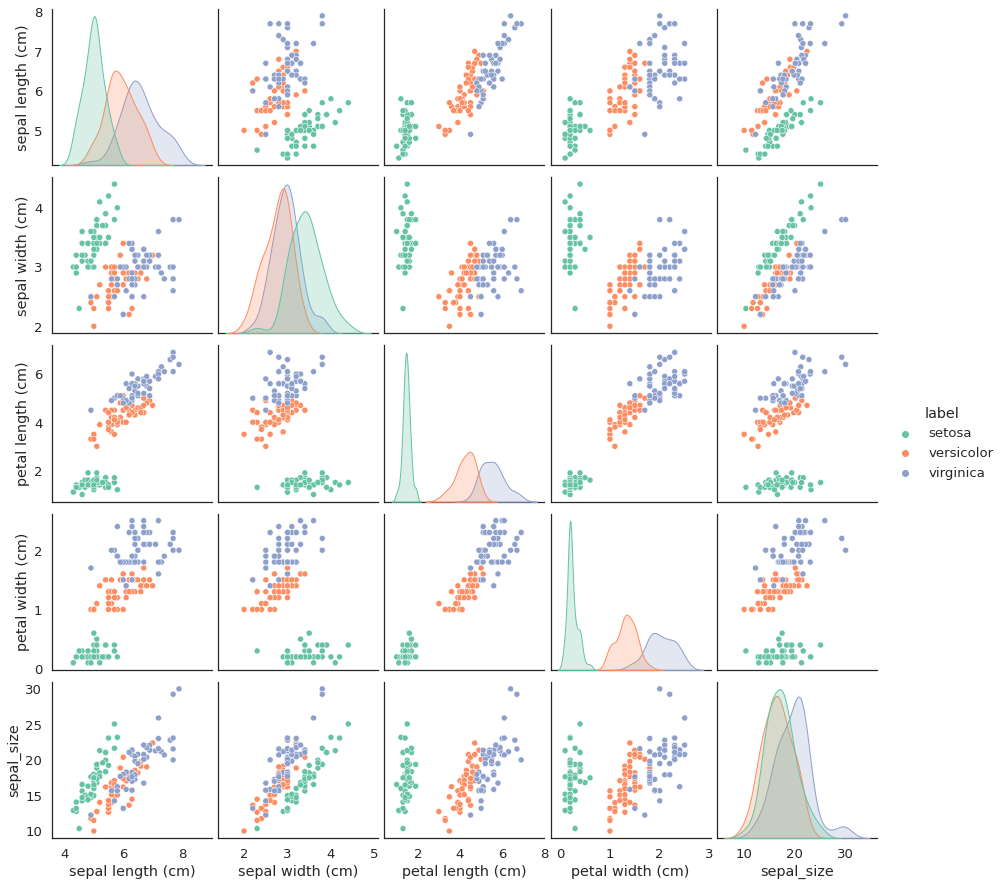

In [44]:
sns.pairplot(data=iris,
             hue = 'label', # label 별로 distribution을 파악합니다.
             
             
             
             )

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

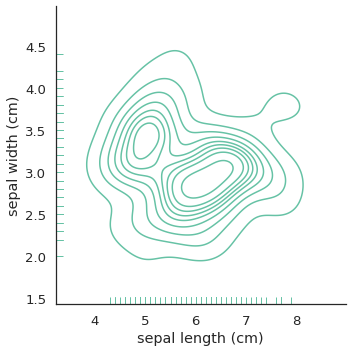

In [52]:
sns.displot(data=iris, x=x_names[0], y=x_names[1], 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='kde', # {“hist”, “kde”, “ecdf”}
                rug=True, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

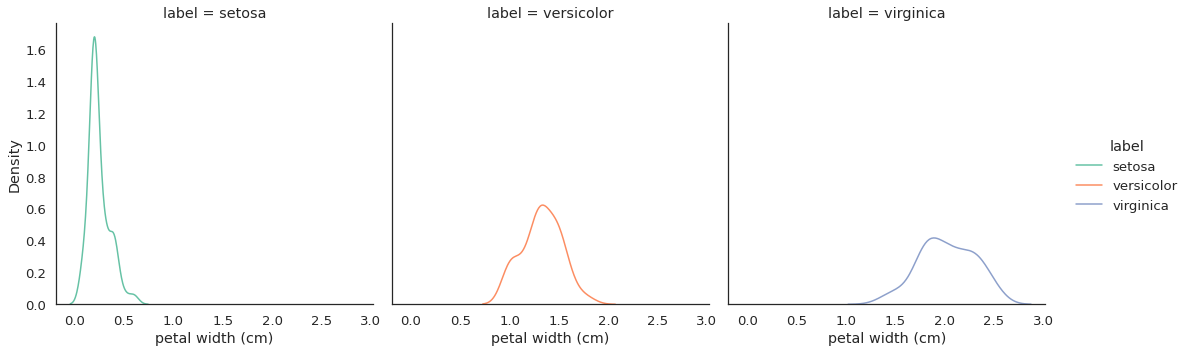

In [59]:
sns.displot(iris, x=x_names[-1], hue='label',
            kind='kde',
            col='label',)

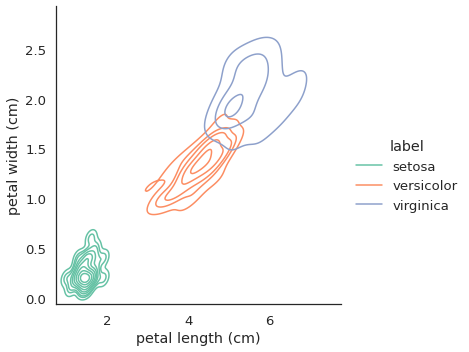

In [69]:
sns.displot(data=iris,
            x=x_names[2], y=x_names[-1],
            hue='label',
            kind='kde',
            )

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8fb90c8050> (for post_execute):


KeyboardInterrupt: ignored

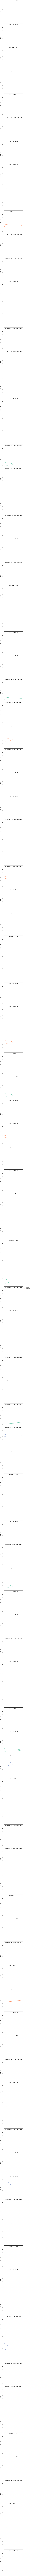

In [71]:
sns.displot(data=iris,
            y=x_names[-1],
            hue='label',
            kind='kde',
            )

#  row='sepal_size',
#             height=3,
#             aspect=1.6

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

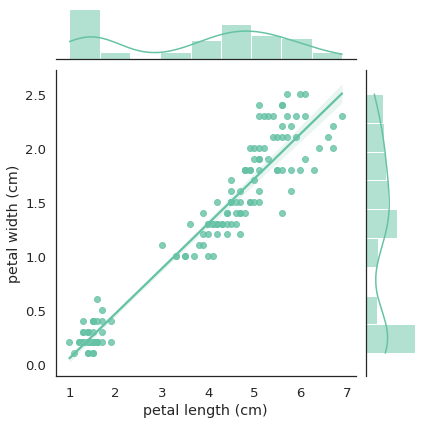

In [79]:
sns.jointplot(x=x_names[2], y=x_names[3], data=iris, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                  #hue='label',
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='reg', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)

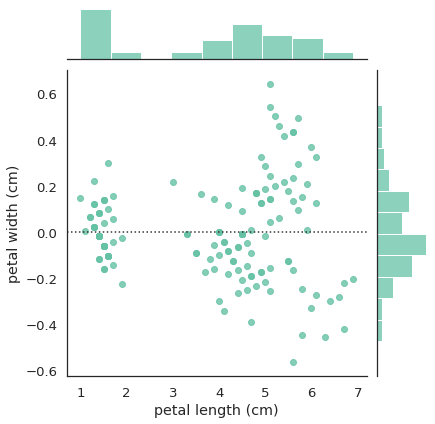

In [80]:
sns.jointplot(x=x_names[2], y=x_names[3], data=iris, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                  #hue='label',
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='resid', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)

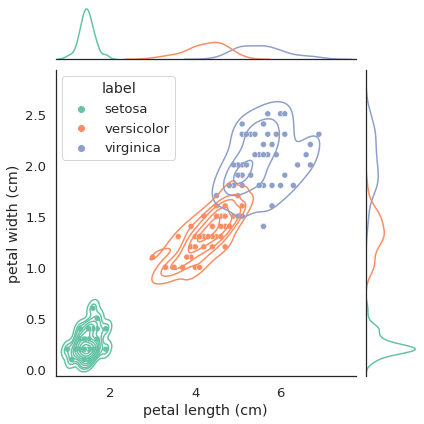

In [83]:
g=sns.jointplot(x=x_names[2], y=x_names[3], data=iris, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                  hue='label',
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

In [88]:
df = sns.load_dataset('penguins')
print(df.head())
print(df.info())
print(df.species.unique())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

#### | 데이터 기본 탐색


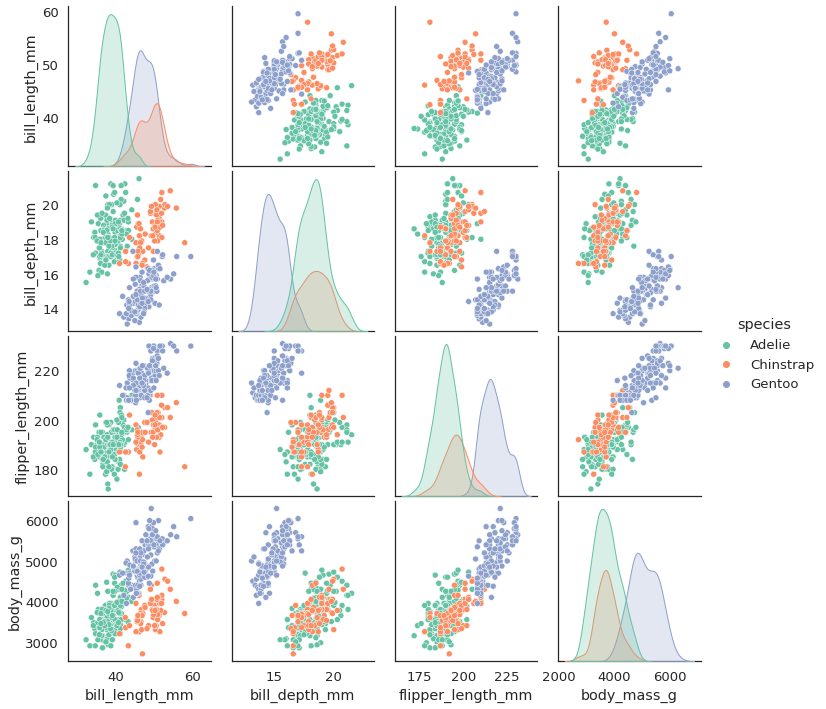

In [98]:
df.head()
sns.pairplot(data=df,
             hue='species',
             kind=''
             )
# 펭귄들의 species('Adelie, Chinstrap, Gentoo)로 나누어서 분석을 진행하였습니다.
# 전체적인 지표들을 보니 Gentoo가 다른 개체들과 비교적 뚜렷하게 나타나는 부분들이 있었습니다.
# 종을 기준으로 bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g를 1개1 비교 6번 하였습니다.

In [99]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### (2) Distributions plot


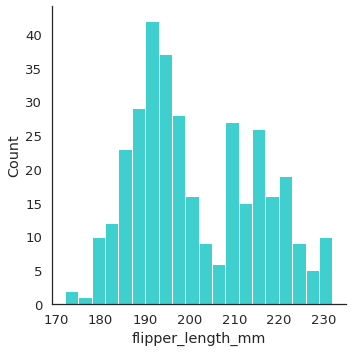

In [110]:
sns.displot(df, x='flipper_length_mm', binwidth=3,
            color='c')
# 종 구분없이 날개 길이의 분포도

### (3) Joint plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


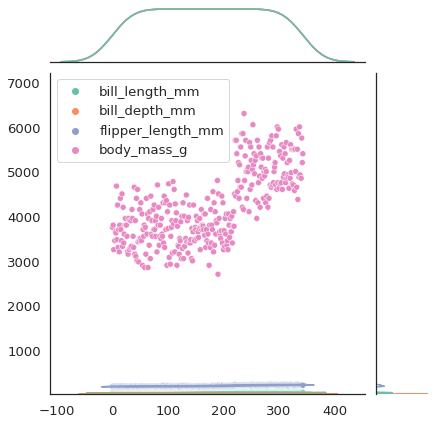

In [113]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                
                hue_order=None,
                color=None, 
                palette=None,
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                xlim=None, ylim=None, 
                marginal_ticks=False)
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)

 

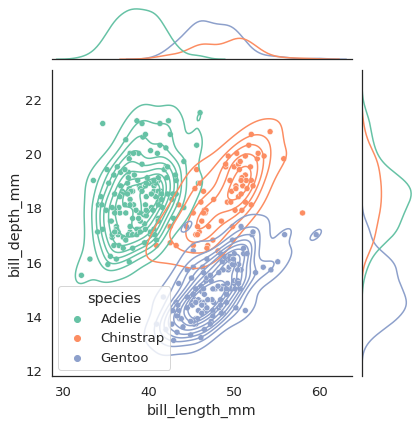

In [117]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'bill_length_mm',
                y = 'bill_depth_mm',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 부리의 길이와 부리의 폭을 비교해 본 결과 Gentoo가 가장 부리가 길지만, 제일 폭이 좁은 것으로 나왔습니다.
# Adelie 펭귄과 chinstrap 펭귄의 폭이 얼추 비슷하게 나왔으나, 길이는 chinstrap이 긴 것으로 나왔습니다.

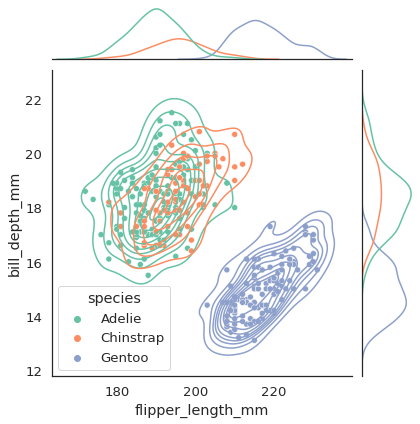

In [118]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'flipper_length_mm',
                y = 'bill_depth_mm',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 날개 길이와, 부리의 길이 관계를 확인해 본 결과, Gentoo 펭귄이 확실히 두드러지는 결과가 나와습니다. 날개 길이는 가장 길지만, 폭이 가장 좁게 나오게 되었습니다.

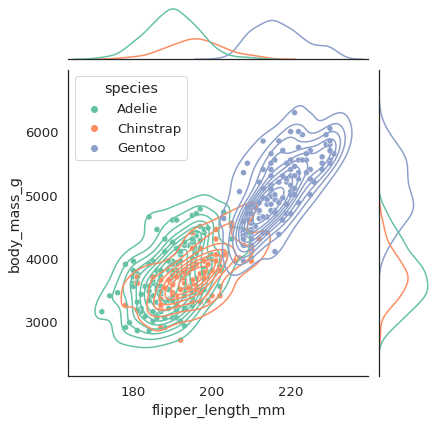

In [119]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'flipper_length_mm',
                y = 'body_mass_g',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 날개길이와 무게를 비교해 본 결과, Gentoo 펭귄의 날개가 가장 길고, 몸무게 또한 가장 큰 것으로 나오게 되었습니다.

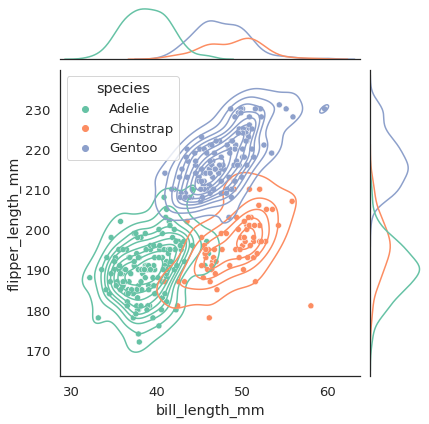

In [120]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'bill_length_mm',
                y = 'flipper_length_mm',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 부리와 날개의 길이를 확인해 본 결과입니다.

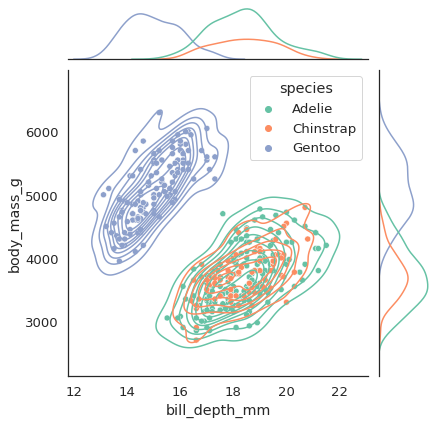

In [121]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'bill_depth_mm',
                y = 'body_mass_g',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 부리의 폭과 몸무게를 확인해 본 결과, Gentoo가 가장 부리의 폭이 작으나, 무게가 가장 많이 나가는 것을 알 수 있습니다.

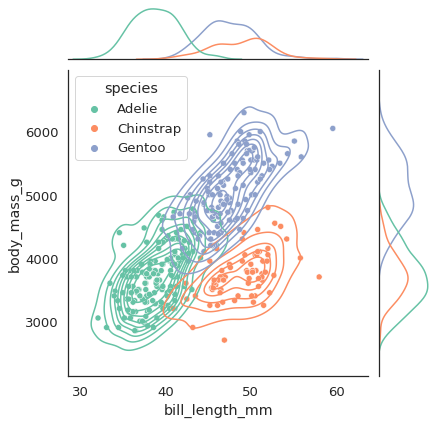

In [122]:
g=sns.jointplot(data=df, # 다른 두 기능을 같이 한 그림에 한번에 그리는 것입니다.
                x = 'bill_length_mm',
                y = 'body_mass_g',
                hue='species',
                
                kind='kde', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } # hue를 지우면 'hex'를 사용 할 수 있습니다.
                height=6, ratio=5, space=0.2, 
                )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)
# 부리의 길이와 몸무게를 비교한 그래프입니다.